In [21]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
target = pd.read_csv("Target.csv")
submission = pd.read_csv("Submission.csv")

In [3]:
df = pd.concat([train, test])

In [4]:
df = df.merge(target, how='left')

In [189]:
df

,index,code,year,period,id,Country,population,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,19,EEA_3161-01-1,2009,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.693147
1,20,EEA_3161-05-5,2009,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.218495
2,27,EEA_3161-01-1,2009,2009-01--2009-12,FRDR174,France,122.299437,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.693147
3,28,EEA_3161-05-5,2009,2009-01--2009-12,FRDR174,France,122.299437,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.889405
4,49,EEA_3161-01-1,2009,2009-01--2009-12,FRGR0178A,France,122.299437,71176346.0,5.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.510826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,19438,EEA_3161-02-2,2010,2010-01--2010-12,FRHR180,France,122.299437,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,NaN
2195,19462,EEA_3161-02-2,2010,2010-01--2010-12,FRHR228A,France,122.299437,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,NaN
2196,19625,EEA_3161-02-2,2009,2009-01--2009-12,UKSC020637,United Kingdom,274.708982,25867961.0,0.0,0.000000,16.7,2.2,3.5,28.2,18.9,20.2,0.0,2.7,27.25,NaN
2197,19690,EEA_3161-05-5,2010,2010-01--2010-12,ES030MSPF1020010,Spain,93.677197,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,NaN


In [5]:
df["waste_all"] = df["plastic"] + df["food"] + df["paper"] + df["green_waste"] + df["glass"] +df["other"]+ df["metal"] + df["leather"]

In [6]:
df["waste_all"].value_counts()

100.00    1652
98.00      221
92.40      214
99.23       48
97.49       36
97.80       16
100.10       6
116.05       6
Name: waste_all, dtype: int64

In [7]:
df["population"].value_counts()

122.299437    1636
93.677197      221
274.708982     214
18.148547       48
377.379590      36
30.993471       16
24.981498       10
237.307597       6
44.723076        6
79.837686        3
250.185185       3
Name: population, dtype: int64

In [8]:
df["rate"].value_counts()

0.000000     1953
87.158924     221
22.198357      16
11.090622       6
21.867102       3
Name: rate, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2199 entries, 0 to 219
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2199 non-null   int64  
 1   code             2199 non-null   object 
 2   year             2199 non-null   int64  
 3   period           2199 non-null   object 
 4   id               2199 non-null   object 
 5   Country          2199 non-null   object 
 6   population       2199 non-null   float64
 7   tourists         2199 non-null   float64
 8   venue            2199 non-null   float64
 9   rate             2199 non-null   float64
 10  food             2199 non-null   float64
 11  glass            2199 non-null   float64
 12  metal            2199 non-null   float64
 13  other            2199 non-null   float64
 14  paper            2199 non-null   float64
 15  plastic          2199 non-null   float64
 16  leather          2199 non-null   float64
 17  green_waste    

In [10]:
cat_column = ["code", "period", "id", "Country"]
num_column = ["year", "population", "tourists", "venue", "rate", "food", "glass", "metal", "other", "paper", "plastic", "leather", "green_waste", "waste_recycling"]
column_name= cat_column + num_column

Матрица корреляции. Рассмотрим связь признаков друг с другом и с таргетом

<AxesSubplot:>

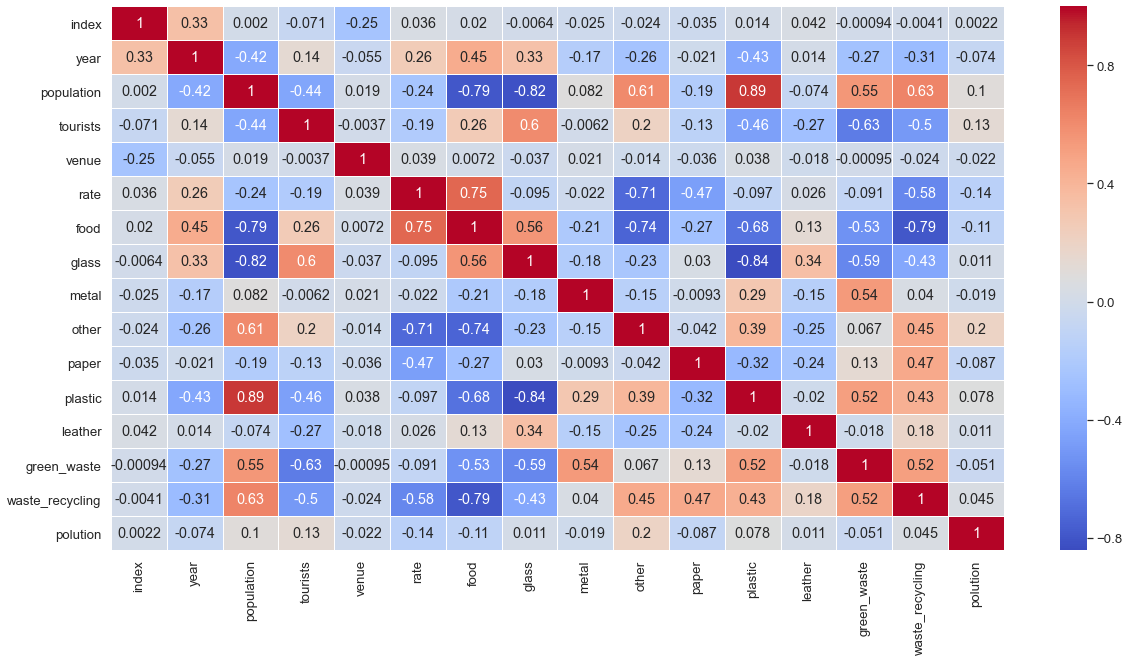

In [176]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.2)
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

### Рассмотрим связь коррелирующих  друг с другом признаков

In [5]:
df = df.drop("green_waste", axis = 1)
# df = df.drop("food", axis = 1)
df = df.drop("paper", axis = 1)
df = df.drop("metal", axis = 1)
df = df.drop("leather", axis = 1)
df = df.drop("glass", axis = 1)
df = df.drop("plastic", axis = 1)
# # df = df.drop("other", axis = 1)

In [6]:
# df = df.drop("population", axis = 1)

In [7]:
# df = df.drop("tourists", axis = 1)

In [8]:
# df = df.drop("rate", axis = 1)

In [9]:
df = df.drop("venue", axis = 1)

In [10]:
df = df.drop("year", axis = 1)

In [11]:
df = df.drop("index", axis = 1)

<AxesSubplot:>

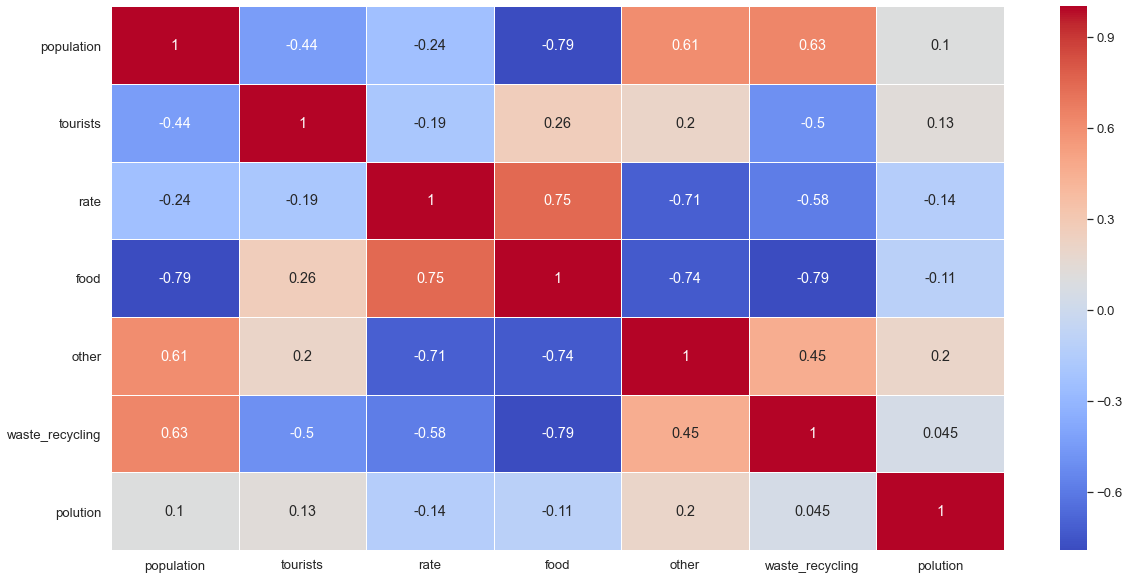

In [12]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.2)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

## Категориальные признаки

In [15]:
### Категориальные
df

,code,period,id,Country,other,waste_recycling,waste_all
0,EEA_3161-01-1,2009-01--2009-12,FRDR179,France,26.0,22.26,100.0
1,EEA_3161-05-5,2009-01--2009-12,FRDR179,France,26.0,22.26,100.0
2,EEA_3161-01-1,2009-01--2009-12,FRDR174,France,26.0,22.26,100.0
3,EEA_3161-05-5,2009-01--2009-12,FRDR174,France,26.0,22.26,100.0
4,EEA_3161-01-1,2009-01--2009-12,FRGR0178A,France,26.0,22.26,100.0
...,...,...,...,...,...,...,...
215,EEA_3161-02-2,2010-01--2010-12,FRHR180,France,26.0,22.26,100.0
216,EEA_3161-02-2,2010-01--2010-12,FRHR228A,France,26.0,22.26,100.0
217,EEA_3161-02-2,2009-01--2009-12,UKSC020637,United Kingdom,28.2,27.25,92.4
218,EEA_3161-05-5,2010-01--2010-12,ES030MSPF1020010,Spain,14.0,16.84,98.0


### Period

Рассчитаем число месяцев в течении которых были произведены измерения

In [669]:
def convert_to_arr(col):
    string = str(col)
    dates = string.split('--')
    arr = []
    for i in dates:
        ym = i.split('-')
        arr.append((int(ym[0]), int(ym[1])))
    return arr

In [670]:
def convert_to_month(arr):
    arr = convert_to_arr(arr)
    if arr[0][0] == arr[1][0]:
        m = arr[1][1]-arr[0][1]+1
    else: 
        m = 12 - arr[0][1] + arr[1][1] +1
    return m

In [671]:
df['period_month'] = df['period'].apply(convert_to_month)

In [672]:
df.drop("period", axis=1, inplace=True)

### Tourists

### Сделаем one hot encoding категориальных признаков

In [883]:
df=df.drop("waste_recycling", axis=1)

In [926]:
df["waste_recycling"].value_counts()

22.260    1636
16.840     221
27.250     214
28.120      48
34.303      36
21.230      16
32.370      10
47.830       6
22.920       6
0.760        3
28.370       3
Name: waste_recycling, dtype: int64

In [13]:
df=df.drop("polution", axis=1)

In [14]:
# df=df.drop("index", axis=1)

In [15]:
df.head()

,code,period,id,Country,population,tourists,rate,food,other,waste_recycling
0,EEA_3161-01-1,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,0.0,32.0,26.0,22.26
1,EEA_3161-05-5,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,0.0,32.0,26.0,22.26
2,EEA_3161-01-1,2009-01--2009-12,FRDR174,France,122.299437,71176346.0,0.0,32.0,26.0,22.26
3,EEA_3161-05-5,2009-01--2009-12,FRDR174,France,122.299437,71176346.0,0.0,32.0,26.0,22.26
4,EEA_3161-01-1,2009-01--2009-12,FRGR0178A,France,122.299437,71176346.0,0.0,32.0,26.0,22.26


In [16]:
df = pd.get_dummies(df, columns=["code", "id", "period", "Country"])

In [17]:
df

,population,tourists,rate,food,other,waste_recycling,code_EEA_3161-01-1,code_EEA_3161-02-2,code_EEA_3161-03-3,code_EEA_3161-05-5,...,Country_Finland,Country_France,Country_Germany,Country_Latvia,Country_Lithuania,Country_Luxembourg,Country_Serbia,Country_Spain,Country_Sweden,Country_United Kingdom
0,122.299437,71176346.0,0.000000,32.0,26.0,22.26,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,122.299437,71176346.0,0.000000,32.0,26.0,22.26,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,122.299437,71176346.0,0.000000,32.0,26.0,22.26,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,122.299437,71176346.0,0.000000,32.0,26.0,22.26,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,122.299437,71176346.0,0.000000,32.0,26.0,22.26,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,122.299437,71176346.0,0.000000,32.0,26.0,22.26,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2195,122.299437,71176346.0,0.000000,32.0,26.0,22.26,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2196,274.708982,25867961.0,0.000000,16.7,28.2,27.25,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2197,93.677197,50941692.0,87.158924,49.0,14.0,16.84,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [431]:
num_column = ["year", "population", "tourists", "venue", "rate", "food", "glass", "metal", "other", "paper", "plastic", "leather", "green_waste", "waste_recycling"]

In [18]:
num_column = ["tourists", "other", "population", "rate",  "waste_recycling", "food"]

#### StandardScaler на всем наборе данных без разбиения

In [19]:
def get_scale(df,col, model):
    
    scal = model.fit_transform(df[col])
    df[col] = scal
    return df

In [22]:
df = get_scale(df, num_column, MinMaxScaler())

In [ ]:
df

In [767]:
# df = pd.get_dummies(df, columns=['code','id','Country'])

In [768]:
# df = pd.get_dummies(df, columns=['code'])

In [769]:
# set(df['Country'].values)

In [770]:
# col = ["Country", "id"]

In [771]:
# df_l = df.copy()
# df_l[col] = df_l[col].astype('category')

# for _, column_name in enumerate(col):
#     df_l[column_name] =  df_l[column_name].cat.codes

In [772]:
# df_l

In [773]:
# def label_encoder(col):
#     arr = list(set(col.values))
#     dict_ = {}
#     for i in range(1, len(arr)+1):
#         dict_[arr[i-1]] = i
#     return dict_

In [774]:
# dict_ = label_encoder(df['Country'])
# print(dict_)

In [23]:
train = df.iloc[0:train.shape[0],:]
test = df.iloc[train.shape[0]:,:]

In [24]:
y_train = target['polution'].values.ravel()

In [25]:
X_train = train.values
X_test = test.values

In [26]:
from sklearn.model_selection import train_test_split
X_train_, X_val, y_train_, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 42)

In [341]:
# from sklearn.model_selection import train_test_split
# X,y = df.drop(columns = ['polution']).values,df['polution'].values

# features_names = df.drop(columns = ['polution']).columns

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Класс Линейной Регрессии

In [27]:
class LinearRegression():
    def __init__(self, 
                 learning_rate = 0.5, 
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        
        self.n_batches = n_batches
        
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
                self.weights = np.append(self.bias,self.weights)
    
    #---------------------------------
    def forward(self, X):
        return np.dot(X, self.weights)
    
    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size
    
    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size
    
    #---------------------------------
    def update(self):    
        return self.weights - self.lr*self.grad
    
    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)
    
    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat.squeeze()
    
    #---------------------------------
    def score(self, X, y):        
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))
    
    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])
        
        if self.bias is None: 
            self.bias    = self.init(1)
        
        if self.weights.size == X.shape[1]:
            self.weights = np.append(self.bias,self.weights)
        
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:            
            self.batch_size = y.size
            
        if self.n_batches is None:
            self.n_batches = y.size//self.batch_size
            
        for i in range(self.epochs): 
            loss = 0
            for cnt,(x_batch, y_batch) in enumerate(self.load_batch(X,y)): 

                yhat         = self.forward(x_batch)
                self.grad    = self.grad_step(yhat,  y_batch, x_batch) 
                self.weights = self.update() 
                loss += self.loss(yhat,  y_batch)
                
                if cnt>= self.n_batches:
                    break
            self.cost[i] = loss/self.n_batches
        
        self.bias = self.weights[0]
    #--------------------------------

    def load_batch(self,X,y):
        idxs = np.arange(y.size)
        np.random.shuffle(idxs)

        for i_batch in range(0,y.size,self.batch_size):
            idx_batch = idxs[i_batch:i_batch+self.batch_size]
            x_batch   = np.take(X, idx_batch,axis=0)
            x_batch   = self.add_bias(x_batch)
            y_batch   = np.take(y, idx_batch)
            yield  x_batch, y_batch
    
    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))
    
    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()
    
    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

In [28]:
class ElasticRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 l2_penalty = 0.001,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):   
        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size
        return np.square(yhat - y).mean() + l1_term + l2_term
                  
    
    #---------------------------------
    def update(self):    
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + self.l1_penalty + l2_term)

In [29]:
class RidgeRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l2_penalty = 0.001,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 n_batches    = None,
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         n_batches    = n_batches,
                         random_state = random_state)
        self.l2_penalty = l2_penalty
        
    #---------------------------------
    def loss(self,yhat, y):   
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l2_term

    #---------------------------------
    def update(self):    
        l2_term = self.l2_penalty*np.mean(self.weights[1:])
        return self.weights - self.lr*(self.grad + l2_term)  

In [497]:
from sklearn.linear_model import ElasticNet

In [502]:
regr = ElasticNet(alpha=0.5, random_state=0)

In [503]:
regr.fit(X_train, y_train)

ElasticNet(alpha=0.5, random_state=0)

In [504]:
y_pred2 = regr.predict(X_test)

In [505]:
y_pred2

array([1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245602,
       1.04245602, 1.04245602, 1.04245602, 1.04245602, 1.04245

### Стандартизация 

In [30]:
regr_l1l2 = ElasticRegression(learning_rate=0.1,
                         epochs=300,batch_size=45,
                         l1_penalty = 0.0001,l2_penalty = 0.0001 )
regr_l1l2.fit(X_train, y_train)


Test Score = 0.66, Train Score = 0.84


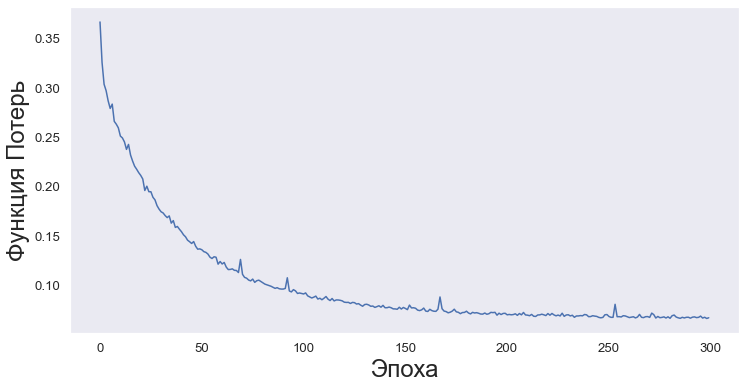

In [405]:
regr_l1l2 = ElasticRegression(learning_rate=0.1,
                         epochs=300,batch_size=45,
                         l1_penalty = 0.0001,l2_penalty = 0.0001 )
regr_l1l2.fit(X_train_, y_train_)

print(f'Test Score = {regr_l1l2.score(X_val, y_val):.2f}, Train Score = {regr_l1l2.score(X_train_, y_train_):.2f}')
regr_l1l2.plot_cost()

In [31]:
y_pred1 = regr_l1l2.predict(X_test)

In [32]:
y_pred1

array([ 1.27408004,  0.82009392,  1.51001228,  1.51711369,  1.31296335,
        0.47581857,  0.44693307,  1.21902355,  1.38374972,  0.73776773,
        0.58312119,  1.57543071,  2.00747046,  0.3425698 ,  2.27287011,
        2.05632725,  2.03008964,  0.93104769,  0.85781632,  0.86479697,
        0.89806693,  2.01567973,  1.75445979,  0.88731496,  0.71205012,
        0.61016035,  0.70759998,  1.99561266,  0.89680708,  1.55278143,
        1.18519102,  0.05956484, -0.52013293,  1.38421872,  0.8272844 ,
        0.33436103,  0.84926936,  0.65525897,  1.085991  ,  1.01311921,
        1.15325945,  1.78462969,  0.54035113,  0.67176113,  0.2393294 ,
        0.81357175,  1.10643093,  1.05874311,  1.5352643 ,  0.97875541,
        1.47042516,  0.67214068,  1.18290576,  0.92164978,  1.54725431,
        1.45114214,  0.86690085,  0.45491581,  1.66418292,  0.65061057,
        1.54189541,  1.15112824,  1.12887079,  0.94737679,  1.07586207,
        1.00461273,  1.22025033,  1.65366992,  1.01609999,  0.67

In [123]:
y_pred = regr_l1l2.predict(X_test)

In [124]:
y_pred

array([ 1.30792424,  0.73438805,  1.5057852 ,  1.56011037,  1.33699157,
        0.37863978,  0.33405681,  1.36926993,  1.39094766,  0.84175747,
        0.56547005,  1.61110275,  1.85805963,  0.44260146,  2.30122603,
        2.07341115,  2.10231158,  0.9129319 ,  0.92628674,  0.85263131,
        1.07726036,  2.05929607,  1.70959826,  0.98340472,  0.80486889,
        0.60521269,  0.7892215 ,  2.01839608,  0.83333897,  1.60925661,
        1.33418422, -0.13756451, -0.53438361,  1.38725651,  1.01647623,
        0.64905984,  0.92559898,  0.71915784,  1.09689339,  1.01779873,
        1.09434447,  1.8018788 ,  0.59612809,  0.70880366,  0.27667524,
        0.84153812,  1.10356902,  1.10666555,  1.61883931,  0.85337189,
        1.42689934,  0.74133922,  1.07649069,  0.92077358,  1.56972541,
        1.23629412, -0.21901976,  0.4579002 ,  1.81942926,  0.43841429,
        1.29975796,  1.19111396,  1.25273556,  0.95988842,  0.98390232,
        1.19962118,  1.30553098,  1.54006362,  1.08241218,  0.67

In [33]:
submission['polution'] = y_pred1

In [34]:
submission

,index,polution
0,202,1.274080
1,395,0.820094
2,725,1.510012
3,770,1.517114
4,771,1.312963
...,...,...
215,19438,1.880575
216,19462,1.524186
217,19625,0.121744
218,19690,0.373765


In [147]:
submission['polution'] = y_pred

In [148]:
submission

,index,polution
0,202,1.307924
1,395,0.734388
2,725,1.505785
3,770,1.560110
4,771,1.336992
...,...,...
215,19438,1.879628
216,19462,1.527396
217,19625,0.253901
218,19690,0.155125


In [35]:
submission = submission.set_index('index')

In [36]:
submission

,polution
index,
202,1.274080
395,0.820094
725,1.510012
770,1.517114
771,1.312963
...,...
19438,1.880575
19462,1.524186
19625,0.121744


In [37]:
submission.to_csv('My_Submission_row_0_pt_without_val_food.csv',index=True)

In [420]:
# regr = LinearRegression(learning_rate=0.5,epochs=300,batch_size=25)
# regr.fit(X_train, y_train)

# regr.plot_cost()

# print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

Test Score = 0.65, Train Score = 0.84


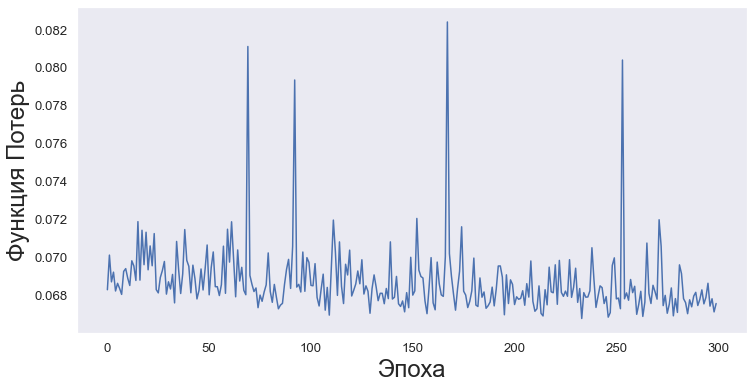

In [108]:
regr = LinearRegression(learning_rate=0.1,
                        epochs=300,batch_size=45,
                        n_batches=None
                        )

regr_l1l2.fit(X_train_, y_train_)

print(f'Test Score = {regr_l1l2.score(X_val, y_val):.2f}, Train Score = {regr_l1l2.score(X_train_, y_train_):.2f}')
regr_l1l2.plot_cost()

Test Score = 0.65, Train Score = 0.84


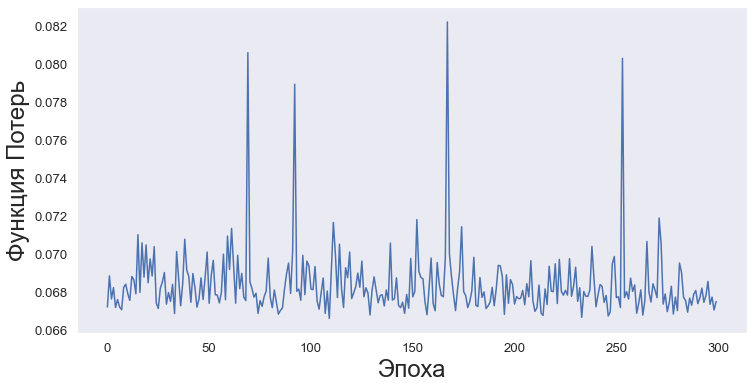

In [109]:
regr_l2 = RidgeRegression(learning_rate=0.25,
                       epochs=300, batch_size=10,
                       l2_penalty = 0.001)
regr_l1l2.fit(X_train_, y_train_)

print(f'Test Score = {regr_l1l2.score(X_val, y_val):.2f}, Train Score = {regr_l1l2.score(X_train_, y_train_):.2f}')
regr_l1l2.plot_cost()

In [ ]:
X_train_, X_val, y_train_, y_val

In [413]:
from sklearn.linear_model import ElasticNet

In [113]:
regr = ElasticNet(random_state=42)

In [114]:
regr.fit(X_train_, y_train_)

ElasticNet(random_state=42)

In [117]:
regr.score(X_train_, y_train_)

0.0

In [ ]:
X_train_, X_val, y_train_, y_val

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [132]:
model = LinearRegression()

In [133]:
model.fit(X_train_, y_train_)

LinearRegression()

In [156]:
pred = model.predict(X_test)

In [151]:
submission

,index,polution
0,202,1.086796
1,395,1.086796
2,725,1.086796
3,770,1.086796
4,771,1.086796
...,...,...
215,19438,1.086796
216,19462,1.086796
217,19625,1.086796
218,19690,1.086796


In [157]:
sub=submission.values

In [158]:
from sklearn.metrics import r2_score

In [159]:
r2_score(sub, pred)

ValueError: y_true and y_pred have different number of output (2!=1)